# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## BRCA


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_BRCA.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">October 10th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > BRCA
    
**Dependent files:**

* Target (Cancer) data: 
    - *BRCA_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
BRCA_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/BRCA_Interface_2021-09-28.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-10/ffa0e9d0/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-10-10 23:46:44 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-10\ffa0e9d0\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: BRCA

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('brca', BRCA_PATH)]
)

2021-10-10 23:46:44 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `brca` ..
2021-10-10 23:46:44 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_brca_data` ..
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_brca data materials  ..


#### TCGA Cancer Datasets

##### BRCA

In [4]:
display_data(predator.data_materials["brca"])

Data dimensions: (7467, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


#### Preprocessed TCGA Cancer Datasets

##### BRCA

In [5]:
display_data(predator.data_materials["target_brca_data"])

Data dimensions: (7467, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,R216W,P40306,0.2406,0.246427,0.8858,0.823800,0.789252,0.441485,0.077736,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,E237K,Q14654,0.4663,0.441520,0.4623,0.472829,2.112660,0.986541,0.235649,...,684.0,131.720,131.479,129.5260,129.5260,0.000,0.000,0.00,2.48410,2.92169
2,Q15842,E237K,P63252,0.4663,0.441520,0.5380,0.535672,2.342750,0.990924,0.130527,...,678.0,142.706,142.107,99.1151,99.1190,0.000,624.350,0.00,2.70474,3.18529


### Voting mode: `hard`

In [6]:
predator.predict(voting='hard')

2021-10-10 23:46:45 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.models | Voting mode: hard
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsHard
2021-10-10 23:46:45 | DEBUG    | Predator | Predicting on brca cohort ..
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.models | X shape: (7467, 10)
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
2021-10-10 23:46:45 | DEBUG    | helpers.helpers_predator.models | X sh

In [7]:
# Predictions for first 10 experiment.
predator.predictions["brca"][:3]

[array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 array([0, 1, 0, ..., 1, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 1], dtype=int64)]

2021-10-10 23:46:49 | DEBUG    | helpers.helpers_predator.predictions | Initializing value counts ..


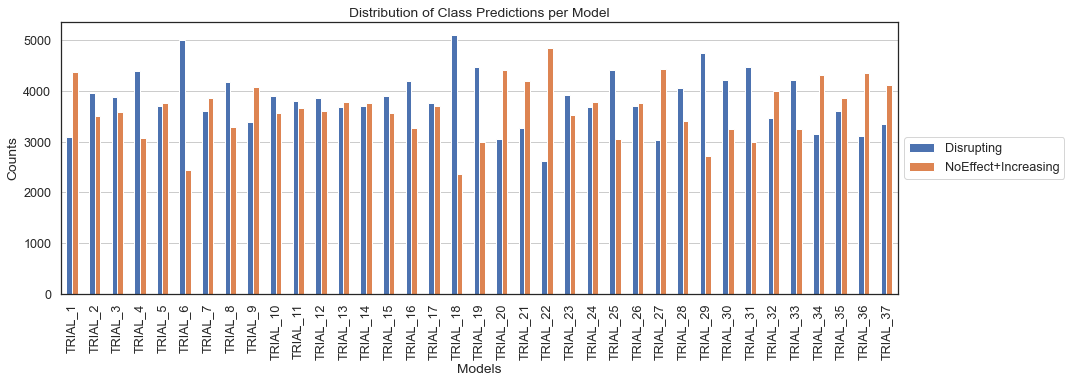

In [8]:
predator.predictions.plot_predictions_distributions("brca")

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{0, 1 or "NoVote"} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries which predicted as both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may be classified both 0 and 1. We drop such instances.

In [9]:
predator.predictions_post_process()

2021-10-10 23:46:50 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-10-10 23:46:50 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort brca ..
2021-10-10 23:46:50 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with brca cancer dataset ..
2021-10-10 23:46:50 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-10-10 23:47:12 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 466): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           1  Q9UBN7    D567Y     Q96DB2
1           0  Q9UBN7    D567Y     Q96DB2
2           0  Q15413   G2795S     Q92736
3           0  Q15413   G2795S     Q92736
4           0  Q15413   G2795S     Q92736
2021-10-10 23:47:31 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1082): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           0  P04637    R280K     Q13625
1           1  P04637    R280K     Q13625
2           1  P04637    R280K     Q13625
3           0  P04637    R280K     P62993
4           0  P04637    R280K     P62993
2021-10-10 23:47:55 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1229): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           1  Q9Y616    F419L     Q16288
1           0  Q9Y616    F419L     Q16288
2    

In [10]:
display_data(predator.predictions["brca_predicted_datasets"][0])

Data dimensions: (7467, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,1,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,1,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


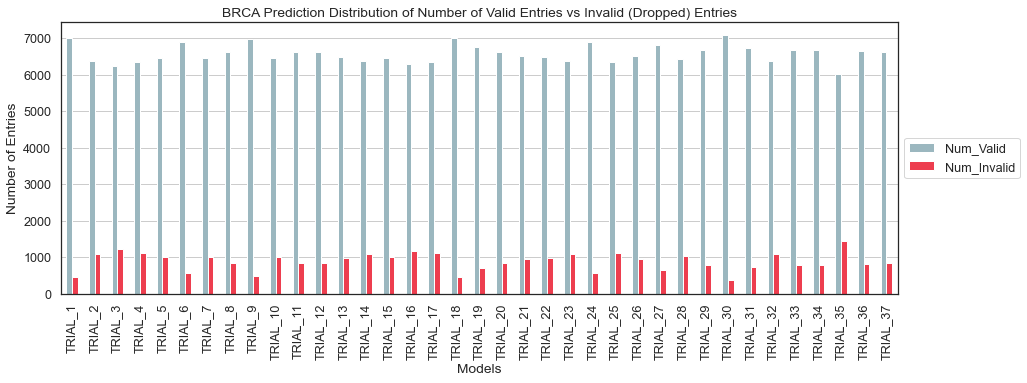

In [11]:
predator.predictions.plot_distribution_valid_vs_invalid("brca")

2021-10-11 00:00:05 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


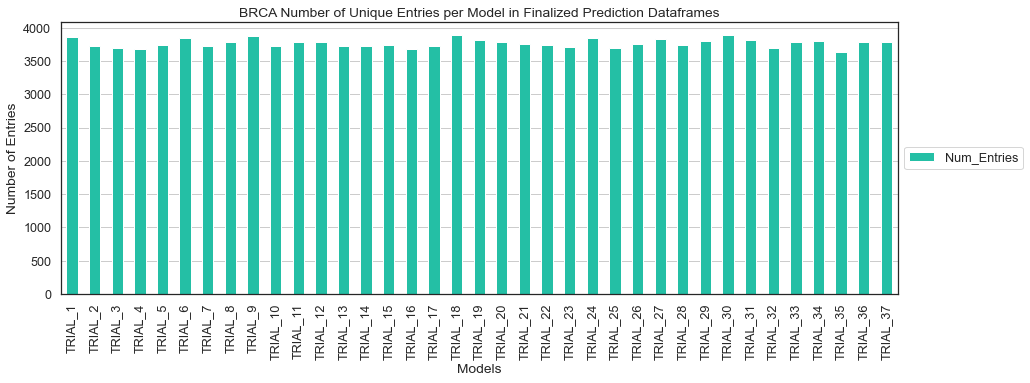

In [12]:
predator.predictions.plot_num_finalized_predictions("brca")

In [13]:
predator.prepare_ensemble_prediction_data()

2021-10-11 00:00:06 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-10-11 00:00:06 | DEBUG    | helpers.helpers_predator.predictions | Preparing ensemble prediction data for brca ..


  0%|          | 0/3985 [00:00<?, ?it/s]

2021-10-11 00:04:36 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for brca is prepared.
2021-10-11 00:04:36 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for brca.
Accessible from predictions.['brca_prediction_results']
2021-10-11 00:04:36 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for brca.
Accessible from predictions.['brca_prediction_results_no_votes_dropped']


In [14]:
display_data(predator.predictions["brca_ensemble_prediction_data"])

Data dimensions: (3985, 7)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Num_preds_0,Num_preds_1,Num_preds_NO_VOTE,VOTED_PREDICTION
0,P28062,R216W,P40306,24,13,0,0
1,Q15842,E237K,Q14654,21,16,0,0
2,Q15842,E237K,P63252,25,12,0,0


In [15]:
display_data(predator.data_materials["brca"])

Data dimensions: (7467, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


In [16]:
display_data(predator.data_materials["Xs_brca"][0])

Data dimensions: (7467, 10)


,Provean_score,EL2_score,Final_ddG,Interactor_alignment_score,Matrix_score,Solvent_accessibility_wt,Solvent_accessibility_mut,van_der_waals_mut,Interactor_template_sequence_identity,Model/DOPE_score
0,-6.335,1.142869,0.789252,0.823800,-4.0,70.4880,66.3922,-22.0706,0.8858,-0.103731
1,-3.934,2.435212,2.112660,0.472829,1.0,85.3259,100.2340,-42.9531,0.4623,0.750751
2,-3.934,2.151470,2.342750,0.535672,1.0,85.2024,97.7820,-48.3449,0.5380,0.902388


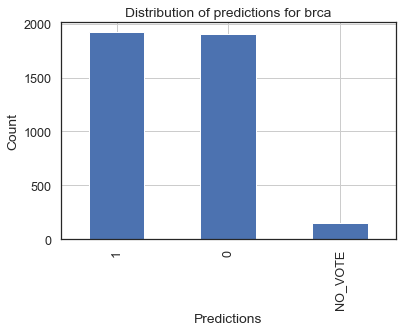

In [17]:
predator.predictions.plot_ensemble_prediction_distribution("brca")

In [18]:
brca_prediction_results_hard = predator.predictions["brca_prediction_results"]
display_data(brca_prediction_results_hard)

Data dimensions: (3985, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


In [19]:
brca_ensemble_prediction_data_hard = predator.predictions["brca_ensemble_prediction_data"]

In [20]:
brca_prediction_results_hard_no_votes_dropped = predator.predictions["brca_prediction_results_no_votes_dropped"]
display_data(brca_prediction_results_hard_no_votes_dropped)

Data dimensions: (3833, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


Label counts:
Disrupting                1908
Increasing + No Effect    1925
Name: Prediction, dtype: int64


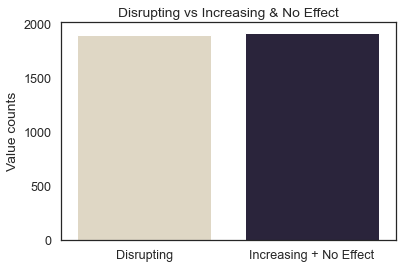

In [21]:
visualize_label_counts(brca_prediction_results_hard_no_votes_dropped, 'Prediction')

### Voting mode: `soft`

In [22]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('brca', BRCA_PATH)]
)

2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `brca` ..
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_brca_data` ..
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_brca data materials  ..


In [23]:
predator.predict(voting='soft')

2021-10-11 00:04:38 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-10-11 00:04:38 | DEBUG    | Predator | Predicting on brca cohort ..
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.models | X shape: (7467, 10)
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
2021-10-11 00:04:38 | DEBUG    | helpers.helpers_predator.models | X sh

In [24]:
predator.predictions.keys()

dict_keys(['brca_prob'])

In [25]:
# Predictions for first 10 experiment.
predator.predictions["brca_prob"][:3]

[array([[0.5657182 , 0.4342818 ],
        [0.46165948, 0.53834052],
        [0.48798707, 0.51201293],
        ...,
        [0.6465034 , 0.3534966 ],
        [0.39057652, 0.60942348],
        [0.37586509, 0.62413491]]),
 array([[0.70114979, 0.29885021],
        [0.40337838, 0.59662162],
        [0.50337838, 0.49662162],
        ...,
        [0.49054834, 0.50945166],
        [0.46314916, 0.53685084],
        [0.62164343, 0.37835657]]),
 array([[0.4283978 , 0.5716022 ],
        [0.39545943, 0.60454057],
        [0.53185632, 0.46814368],
        ...,
        [0.80138574, 0.19861426],
        [0.46901171, 0.53098829],
        [0.2723316 , 0.7276684 ]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

--- todo  add documentation

In [26]:
predator.predictions_post_process()

2021-10-11 00:04:41 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-10-11 00:04:41 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort brca ..
2021-10-11 00:04:41 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-10-11 00:04:41 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with brca cancer dataset ..
2021-10-11 00:04:41 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-10-11 00:05:03 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 466): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.522040  Q9UBN7    D567Y     Q96DB2
1    0.392023  Q9UBN7    D567Y     Q96DB2
2    0.479254  Q15413   G2795S     Q92736
3    0.485835  Q15413   G2795S     Q92736
4    0.452390  Q15413   G2795S     Q92736
2021-10-11 00:05:25 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1082): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.253626  P04637    R280K     Q13625
1    0.701587  P04637    R280K     Q13625
2    0.701587  P04637    R280K     Q13625
3    0.335123  P04637    R280K     P62993
4    0.335123  P04637    R280K     P62993
2021-10-11 00:05:46 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1229): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.767970  Q9Y616    F419L     Q16288
1    0.474737  Q9Y616    F419L     Q16288
2    

In [27]:
predator.predictions.keys()

dict_keys(['brca_prob', 'brca_predicted_probs_datasets', 'brca_predicted_valid_datasets', 'brca_predicted_invalid_datasets', 'brca_finalized_prediction_dataframes'])

In [28]:
display_data(predator.predictions["brca_predicted_probs_datasets"][0])

Data dimensions: (7467, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.434282,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,0.538341,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,0.512013,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


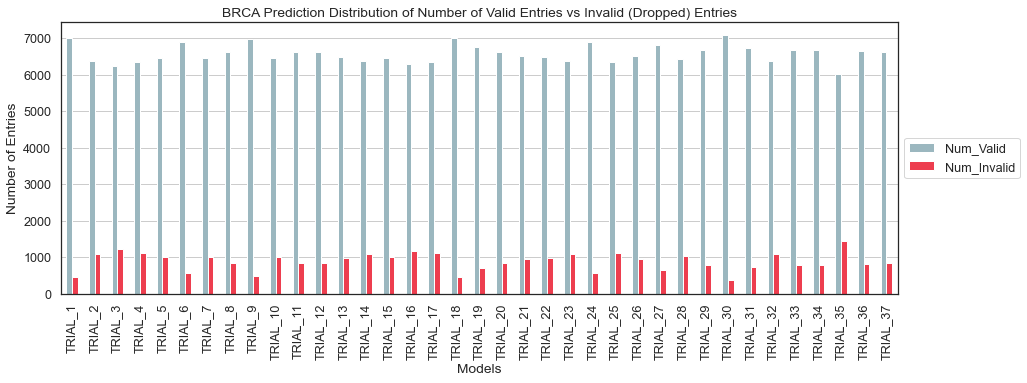

In [29]:
predator.predictions.plot_distribution_valid_vs_invalid("brca")

2021-10-11 00:18:40 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


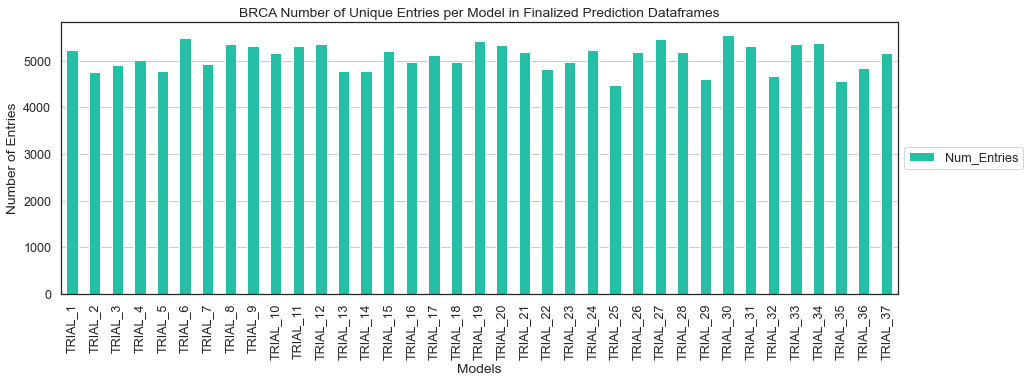

In [31]:
predator.predictions.plot_num_finalized_predictions("brca")

In [32]:
display_data(predator.predictions['brca_finalized_prediction_dataframes'][0])

Data dimensions: (5223, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.434282,P28062,R216W,P40306
1,0.538341,Q15842,E237K,Q14654
2,0.512013,Q15842,E237K,P63252


In [33]:
predator.prepare_ensemble_prediction_data()

2021-10-11 00:18:41 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-10-11 00:18:41 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for brca taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-10-11 00:23:41 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for brca is prepared.
Accessible from `brca_predictions_prob_data`.
2021-10-11 00:23:41 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for brca is prepared.
Accessible from `brca_ensemble_prediction_data`.
2021-10-11 00:23:41 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for brca.
Accessible from predictions.['brca_prediction_results']
2021-10-11 00:23:41 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for brca.
Accessible from predictions.['brca_prediction_results_no_votes_dropped']


In [34]:
display_data(predator.predictions['brca_predictions_prob_data'])

Data dimensions: (3985, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.434282,0.29885,0.571602,0.53894,0.88,0.406419,0.145854,0.345603,0.479683,0.617099,...,0.273818,0.26762,0.749085,0.45756,0.492516,0.477967,0.481381,0.329417,0.47282,0
1,0.538341,0.596622,0.604541,0.3387,0.44,0.40567,0.547424,0.606576,0.495839,0.326261,...,0.461963,0.459715,0.150756,0.450595,0.48094,0.358333,0.428704,0.504303,0.48094,0
2,0.512013,0.496622,0.468144,0.273154,0.4,0.399012,0.618258,0.566063,0.483061,0.258612,...,0.436928,0.452293,0.150756,0.447027,0.469733,0.258333,0.518077,0.401226,0.46814,0


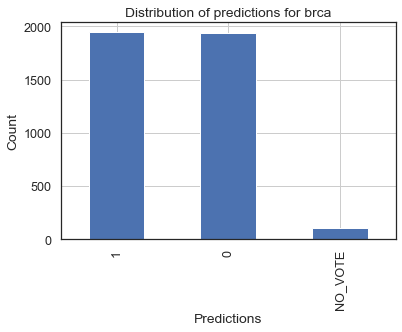

In [35]:
predator.predictions.plot_ensemble_prediction_distribution("brca")

In [36]:
brca_prediction_results_soft = predator.predictions['brca_prediction_results']
display_data(brca_prediction_results_soft)

Data dimensions: (3985, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


In [37]:
brca_prediction_results_soft_no_votes_dropped = predator.predictions["brca_prediction_results_no_votes_dropped"]
display_data(brca_prediction_results_soft_no_votes_dropped)

Data dimensions: (3882, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


Label counts:
Disrupting                1934
Increasing + No Effect    1948
Name: Prediction, dtype: int64


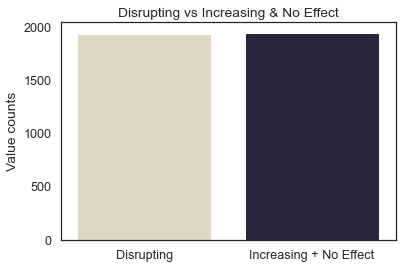

In [38]:
visualize_label_counts(brca_prediction_results_soft_no_votes_dropped, 'Prediction')

In [39]:
brca_ensemble_prediction_data_soft = predator.predictions["brca_ensemble_prediction_data"]

In [40]:
brca_predictions_prob_data_soft = predator.predictions["brca_predictions_prob_data"]

## Exporting Predictions

In [41]:
# brca_prediction_results = brca_prediction_results_hard_no_votes_dropped
brca_prediction_results = brca_prediction_results_soft_no_votes_dropped
display_data(brca_prediction_results)

Data dimensions: (3882, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,0
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


In [43]:
predator.export_prediction(
    tcga="brca",
    data=brca_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-10-11 11:49:58 | DEBUG    | helpers.helpers_predator.common | Folder with ID 2311f534 is created.
2021-10-11 11:49:58 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder brca_prediction_2021-10-11\2311f534..
2021-10-11 11:49:58 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/brca_prediction_2021-10-11\2311f534\predictions_soft_2021-10-11.csv is exported successfully.
2021-10-11 11:49:58 | INFO     | helpers.helpers_predator.common | Config is exported.


---